In [1]:
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json

with open('krx_total_list.txt','r') as f:
    tickers = json.loads(f.read())
len(tickers)

2085

In [3]:
test = pd.read_pickle('./data10y_close_pickle_2/023530')
test.head()

,Close
Date,
2008-01-02,392500.0
2008-01-03,390500.0
2008-01-04,390500.0
2008-01-07,390500.0
2008-01-08,390500.0


(2703, 1) 롯데쇼핑


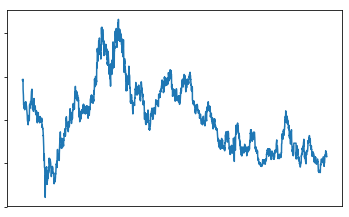

In [4]:

print(test.shape, tickers['023530']['회사명'])
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_visible(False)
ax.set_yticklabels([])
test['Close'].plot();

In [5]:
df = pd.DataFrame({'ds':test.index, 'y':test['Close']})
df.tail()

,ds,y
Date,,
2018-11-28,2018-11-28,220000.0
2018-11-29,2018-11-29,223000.0
2018-11-30,2018-11-30,215500.0
2018-12-03,2018-12-03,215000.0
2018-12-04,2018-12-04,216000.0


In [6]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(df);

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3063,2019-11-30
3064,2019-12-01
3065,2019-12-02
3066,2019-12-03
3067,2019-12-04


In [8]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3063,2019-11-30,211959.987406,139395.616043,283034.333702
3064,2019-12-01,211662.670628,142816.743013,281024.927942
3065,2019-12-02,208835.508518,136859.083754,285872.147915
3066,2019-12-03,208565.200625,135823.061460,279740.689221
3067,2019-12-04,209270.317569,130707.170246,281861.822474


In [9]:
forecast.iloc[2697:2702]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2697,2018-11-27,230619.837718,185334.554413,249054.296463,230619.837718,230619.837718,-12710.072782,-12710.072782,-12710.072782,-11697.936654,...,-1064.627528,-1064.627528,-1064.627528,52.491400,52.491400,52.491400,0.0,0.0,0.0,217909.764936
2698,2018-11-28,230598.816344,185072.538291,253596.535985,230598.816344,230598.816344,-12006.029783,-12006.029783,-12006.029783,-11697.936654,...,-99.009372,-99.009372,-99.009372,-209.083758,-209.083758,-209.083758,0.0,0.0,0.0,218592.786561
2699,2018-11-29,230577.794971,183952.434407,251954.480482,230577.794971,230577.794971,-12427.522922,-12427.522922,-12427.522922,-11697.936654,...,-248.637274,-248.637274,-248.637274,-480.948994,-480.948994,-480.948994,0.0,0.0,0.0,218150.272049
2700,2018-11-30,230556.773597,183071.321196,252323.199728,230556.773597,230556.773597,-12894.231066,-12894.231066,-12894.231066,-11697.936654,...,-438.722309,-438.722309,-438.722309,-757.572104,-757.572104,-757.572104,0.0,0.0,0.0,217662.542531
2701,2018-12-03,230493.709477,186107.690194,250356.673339,230493.709477,230493.709477,-14326.435581,-14326.435581,-14326.435581,-11697.936654,...,-1073.487463,-1073.487463,-1073.487463,-1555.011465,-1555.011465,-1555.011465,0.0,0.0,0.0,216167.273896


In [10]:
forecast.ds[2702]

Timestamp('2018-12-04 00:00:00')

In [11]:
forecast.ds[2702:2705]

2702   2018-12-04
2703   2018-12-05
2704   2018-12-06
Name: ds, dtype: datetime64[ns]

In [12]:
forecast.values[2702]

array([Timestamp('2018-12-04 00:00:00'), 230472.68810372337,
       180940.24216213636, 248815.9215332128, 230472.68810372337,
       230472.68810372337, -14551.402102923797, -14551.402102923797,
       -14551.402102923797, -11697.936653657785, -11697.936653657785,
       -11697.936653657785, -1064.6275279537908, -1064.6275279537908,
       -1064.6275279537908, -1788.8379213122253, -1788.8379213122253,
       -1788.8379213122253, 0.0, 0.0, 0.0, 215921.28600079956],
      dtype=object)

In [13]:
forecast.iloc[3063:3067]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3063,2019-11-30,222883.972304,144542.163587,282528.645175,165247.847642,281489.595766,-10923.984897,-10923.984897,-10923.984897,-11697.936654,...,1462.242130,1462.242130,1462.242130,-688.290373,-688.290373,-688.290373,0.0,0.0,0.0,211959.987406
3064,2019-12-01,222862.950930,149667.325018,280228.794059,164903.572618,281698.768463,-11200.280302,-11200.280302,-11200.280302,-11697.936654,...,1462.241816,1462.241816,1462.241816,-964.585464,-964.585464,-964.585464,0.0,0.0,0.0,211662.670628
3065,2019-12-02,222841.929557,138964.752566,277865.645696,164559.297595,281907.941160,-14006.421039,-14006.421039,-14006.421039,-11697.936654,...,-1073.487463,-1073.487463,-1073.487463,-1234.996923,-1234.996923,-1234.996923,0.0,0.0,0.0,208835.508518
3066,2019-12-03,222820.908183,142195.466986,275772.020590,164215.022572,282117.113857,-14255.707559,-14255.707559,-14255.707559,-11697.936654,...,-1064.627528,-1064.627528,-1064.627528,-1493.143377,-1493.143377,-1493.143377,0.0,0.0,0.0,208565.200625


In [14]:
forecast.loc[forecast['ds'] == '2018-12-04']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2702,2018-12-04,230472.688104,180940.242162,248815.921533,230472.688104,230472.688104,-14551.402103,-14551.402103,-14551.402103,-11697.936654,...,-1064.627528,-1064.627528,-1064.627528,-1788.837921,-1788.837921,-1788.837921,0.0,0.0,0.0,215921.286001


In [15]:
# check forcast
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3063,2019-11-30,222883.972304,144542.163587,282528.645175,165247.847642,281489.595766,-10923.984897,-10923.984897,-10923.984897,-11697.936654,...,1462.242130,1462.242130,1462.242130,-688.290373,-688.290373,-688.290373,0.0,0.0,0.0,211959.987406
3064,2019-12-01,222862.950930,149667.325018,280228.794059,164903.572618,281698.768463,-11200.280302,-11200.280302,-11200.280302,-11697.936654,...,1462.241816,1462.241816,1462.241816,-964.585464,-964.585464,-964.585464,0.0,0.0,0.0,211662.670628
3065,2019-12-02,222841.929557,138964.752566,277865.645696,164559.297595,281907.941160,-14006.421039,-14006.421039,-14006.421039,-11697.936654,...,-1073.487463,-1073.487463,-1073.487463,-1234.996923,-1234.996923,-1234.996923,0.0,0.0,0.0,208835.508518
3066,2019-12-03,222820.908183,142195.466986,275772.020590,164215.022572,282117.113857,-14255.707559,-14255.707559,-14255.707559,-11697.936654,...,-1064.627528,-1064.627528,-1064.627528,-1493.143377,-1493.143377,-1493.143377,0.0,0.0,0.0,208565.200625
3067,2019-12-04,222799.886810,144088.966516,281822.275009,163870.747549,282462.547273,-13529.569241,-13529.569241,-13529.569241,-11697.936654,...,-99.009372,-99.009372,-99.009372,-1732.623215,-1732.623215,-1732.623215,0.0,0.0,0.0,209270.317569


In [16]:
# check forcast
forecast_new = forecast[['ds','yhat']].copy()
forecast_new.tail()

,ds,yhat
3063,2019-11-30,211959.987406
3064,2019-12-01,211662.670628
3065,2019-12-02,208835.508518
3066,2019-12-03,208565.200625
3067,2019-12-04,209270.317569


In [22]:
data1 = forecast[['ds','yhat']].copy()
data1.head()

,ds,yhat
0,2008-01-02,376492.290195
1,2008-01-03,375656.328722
2,2008-01-04,374710.542297
3,2008-01-07,371435.047934
4,2008-01-08,370459.847084


In [17]:
data1 = pd.DataFrame({'ds':forecast.ds, 'yhat':forecast.yhat})
data1 = data1.set_index('ds')
data1.head()

,yhat
ds,
2008-01-02,376492.290195
2008-01-03,375656.328722
2008-01-04,374710.542297
2008-01-07,371435.047934
2008-01-08,370459.847084


In [18]:
data2 = pd.DataFrame({'y':df.y})
data2.head()

,y
Date,
2008-01-02,392500.0
2008-01-03,390500.0
2008-01-04,390500.0
2008-01-07,390500.0
2008-01-08,390500.0


In [19]:
data3 = pd.DataFrame({'close':test.Close})
data3.head()

,close
Date,
2008-01-02,392500.0
2008-01-03,390500.0
2008-01-04,390500.0
2008-01-07,390500.0
2008-01-08,390500.0


In [112]:
new_data = data1.join(data2)
new_data.head()

,yhat,y
ds,,
2008-01-02,376492.290195,392500.0
2008-01-03,375656.328722,390500.0
2008-01-04,374710.542297,390500.0
2008-01-07,371435.047934,390500.0
2008-01-08,370459.847084,390500.0


In [12]:
new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
new_df.head()

,yhat
ds,
2008-01-02,376492.29
2008-01-03,375656.33
2008-01-04,374710.54
2008-01-07,371435.05
2008-01-08,370459.85


In [13]:
new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
new_df = new_df.join(pd.DataFrame({'y':df.y}))
new_df.tail()

,yhat,y
ds,,
2019-11-30,211959.99,NaN
2019-12-01,211662.67,NaN
2019-12-02,208835.51,NaN
2019-12-03,208565.20,NaN
2019-12-04,209270.32,NaN


In [15]:
new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
new_df = new_df.join(pd.DataFrame({'y':df.y}))
new_df.y = new_df.y.fillna(0)
new_df.tail()

,yhat,y
ds,,
2019-11-30,211959.99,0.0
2019-12-01,211662.67,0.0
2019-12-02,208835.51,0.0
2019-12-03,208565.20,0.0
2019-12-04,209270.32,0.0


In [129]:
new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
new_df = new_df.join(pd.DataFrame({'y':df.y}))
new_df.y = new_df.y.fillna('null')
new_df.to_pickle('{}'.format('023530_final'))

In [99]:
new_df.index.strftime('%Y-%m-%d')

Index(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08',
       '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15',
       ...
       '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
       '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04'],
      dtype='object', length=3068)

In [ ]:
new_df3 = pd.DataFrame({'yhat':data1.yhat.round(2), 'y':data2.y})
new_df3.y = new_df.y.fillna('null')
new_df3.head()

In [62]:
new_df.to_pickle('{}'.format('023530'))

In [63]:
new_df_2 = pd.read_pickle('023530')

In [71]:
new_df_2.yhat.tolist()[:10]

[376492.29,
 375656.33,
 374710.54,
 371435.05,
 370459.85,
 370402.63,
 369200.56,
 367938.16,
 364068.16,
 363025.66]

In [68]:
new_df_2.index.tolist()[:10]

[Timestamp('2008-01-02 00:00:00'),
 Timestamp('2008-01-03 00:00:00'),
 Timestamp('2008-01-04 00:00:00'),
 Timestamp('2008-01-07 00:00:00'),
 Timestamp('2008-01-08 00:00:00'),
 Timestamp('2008-01-09 00:00:00'),
 Timestamp('2008-01-10 00:00:00'),
 Timestamp('2008-01-11 00:00:00'),
 Timestamp('2008-01-14 00:00:00'),
 Timestamp('2008-01-15 00:00:00')]

In [67]:
new_df_2.y.tolist()[-10:]

['null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null']

In [55]:
new_df_2 = pd.DataFrame({'yhat':forecast.yhat, 'y':df.y})
new_df_2.head()

,yhat,y
0,376492.290195,NaN
1,375656.328722,NaN
2,374710.542297,NaN
3,371435.047934,NaN
4,370459.847084,NaN


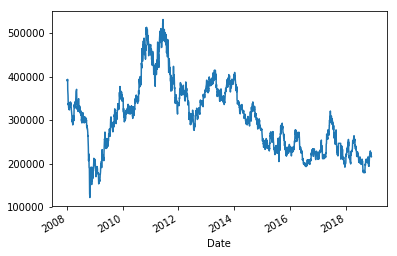

In [35]:
test['Close'].plot()

Text(41.375, 0.5, 'test')

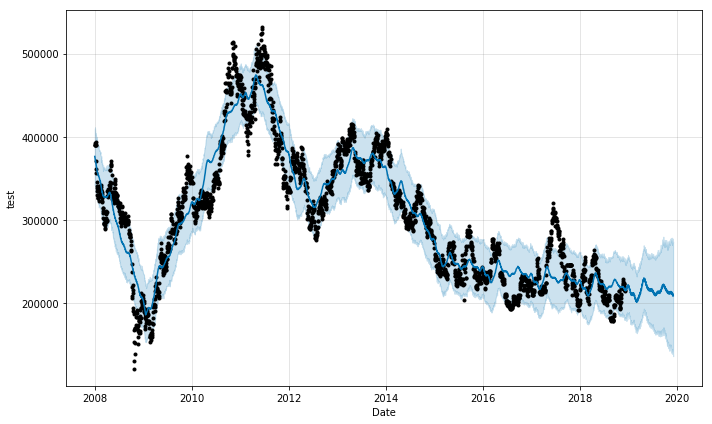

In [12]:
# figure size test
# plt.figure(figsize=(3,4))
figure = m.plot(forecast);
axes = figure.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('test')

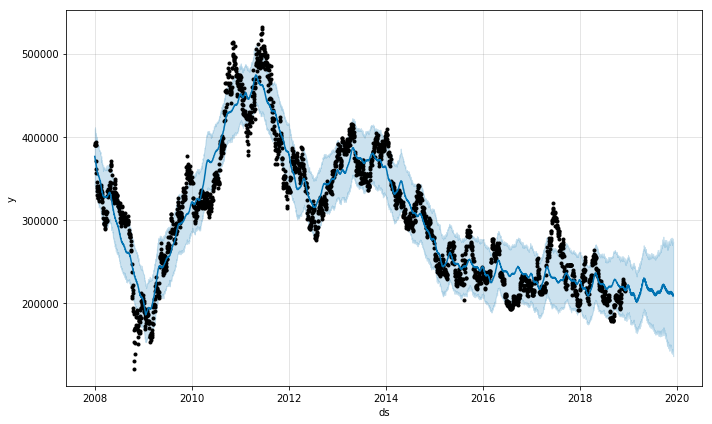

In [14]:
m.plot(forecast);

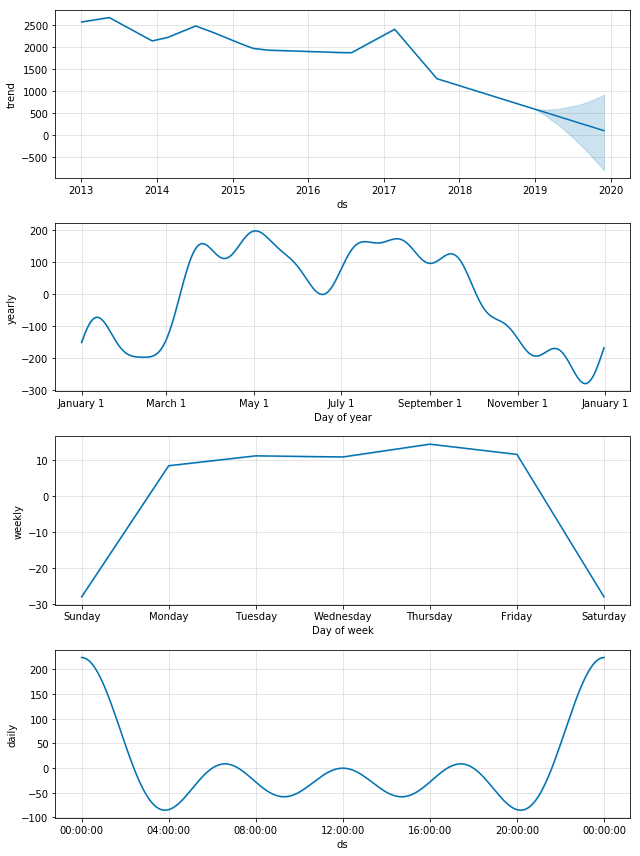

In [15]:
m.plot_components(forecast)

# iteration for chart data

In [134]:
def make_prediction_chart_data(n1, n2):
    cnt = 0;log=[]
    m = Prophet(daily_seasonality=True)
    print('make_prediction_chart_data : {} ~ {}'.format(n1,n2),end='')
    for i,v in tickers.items():
        cnt+=1
        if cnt > n1 and '마켓' in v:
            ticker = i+'.'+v['마켓']
            try:
                data = pd.read_pickle('./data10y/{}'.format(ticker))
                m = Prophet(daily_seasonality=True)
                df = pd.DataFrame({'ds':data.index, 'y':data['Close']})
                m.fit(df);
                future = m.make_future_dataframe(periods=365)
                forecast = m.predict(future)
                
                new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
                new_df = new_df.join(pd.DataFrame({'y':df.y}))
                new_df.y = new_df.y.fillna('null')
                new_df.to_pickle('./data10y_predict_pickle/{}'.format(i))
                
                log.append((cnt,ticker,'completed.',v['회사명']))
                print(cnt,ticker,'.',end='')
            except Exception as e:
                log.append((cnt,ticker,'failed.',e,v['회사명']))
                print(cnt,ticker,'failed',e,v['회사명'])
                pass
        if cnt == n2 :
            break
    print('prediction finished.')
    filename = 'log-predict-{}-{}.txt'.format(n1,n2)
    with open('./data10y_predict_pickle/'+filename, 'w') as f:
        for j in log:
            f.write("{}\n".format(j))
        print(filename,'file saved!')

In [ ]:
make_prediction_chart_data(0,2)

In [132]:
# check
df_check = pd.read_pickle('./data10y_predict_pickle/267850')
df_check.tail()

,yhat,y
ds,,
2019-11-30,96280.99,null
2019-12-01,96512.09,null
2019-12-02,96743.20,null
2019-12-03,96974.30,null
2019-12-04,97205.40,null


# Multi-processing

In [133]:
from multiprocessing import Pool
from time import time as t
start = t()

num_list = list(range(2,10))

def call_job(n):
    make_prediction_chart_data(n,n+1)

pool = Pool(processes=2) # n개의 프로세스를 사용합니다.
pool.map(call_job, num_list) # pool에 일을 던져줍니다.
print('time:', t()-start)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 3 ~ 44 010400.KS .prediction finished.
log-predict-3-4.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 2 ~ 33 293480.KS .prediction finished.
log-predict-2-3.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 4 ~ 55 293940.KS .prediction finished.
log-predict-4-5.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 5 ~ 66 300720.KS .prediction finished.
log-predict-5-6.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 7 ~ 88 286940.KS .prediction finished.
log-predict-7-8.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 6 ~ 77 091810.KS .prediction finished.
log-predict-6-7.txt file saved!


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


make_prediction_chart_data : 8 ~ 99 298040.KS .prediction finished.
log-predict-8-9.txt file saved!
make_prediction_chart_data : 9 ~ 1010 298050.KS .prediction finished.
log-predict-9-10.txt file saved!
time: 23.555920362472534


# speed improve

In [139]:
tickerlist[0]

'267850'

In [147]:
from multiprocessing import Pool
from time import time as t
start = t()

n1 = 1000
n2 = 2085
tickerlist = list(tickers.keys())
num_list = list(range(n1,n2))
print('make prediction : {} ~ {}'.format(n1,n2))

def sub_func(n):
    i = tickerlist[n]
    v = tickers[tickerlist[n]]
    ticker = tickerlist[n]+'.'+v['마켓']
    try:
        data = pd.read_pickle('./data10y/{}'.format(ticker))
        m = Prophet(daily_seasonality=True)
        df = pd.DataFrame({'ds':data.index, 'y':data['Close']})
        m.fit(df);
        future = m.make_future_dataframe(periods=365)
        forecast = m.predict(future)
        
        new_df = pd.DataFrame({'ds':forecast.ds,'yhat':forecast.yhat.round(2)}).set_index('ds')
        new_df = new_df.join(pd.DataFrame({'y':df.y}))
        new_df.y = new_df.y.fillna('null')
        new_df.to_pickle('./data10y_predict_pickle/{}'.format(i))
                
        print(n,ticker,'.',end='')
    except Exception as e:
        print(n,ticker,'failed',e,v['회사명'])
        pass

pool = Pool(processes=2)
pool.map(sub_func, num_list)
print('prediction finished.')
print('time:', t()-start)

make prediction : 1000 ~ 2085


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1000 232140.KQ .1001 191410.KQ .1002 223310.KQ .1003 145020.KQ .1004 222980.KQ .1005 206560.KQ .1006 013310.KQ .1007 217730.KQ failed Dataframe has less than 2 non-NaN rows. 강스템바이오텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1008 047920.KQ .1009 133750.KQ .1010 225530.KQ .1011 140860.KQ .1012 222040.KQ .1013 230240.KQ .1014 122640.KQ .1015 058110.KQ .1016 217820.KQ .1017 213090.KQ .1018 221840.KQ .1019 197210.KQ .1020 180400.KQ .1021 127160.KQ .1022 221980.KQ .1023 212560.KQ .1024 227950.KQ .1025 214370.KQ .1026 185490.KQ failed Dataframe has less than 2 non-NaN rows. 아이진


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1027 190510.KQ .1028 056090.KQ .1029 226340.KQ failed Dataframe has less than 2 non-NaN rows. 본느


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1136 198440.KQ .1137 187270.KQ .1138 177830.KQ .1139 090410.KQ .1140 004650.KQ .1141 192390.KQ .1142 059120.KQ .1143 200130.KQ .1144 105550.KQ .1145 196450.KQ .1146 071850.KQ .1147 187790.KQ .1148 192250.KQ .1149 138080.KQ .1150 108790.KQ .1151 053300.KQ .1152 154040.KQ .1153 090850.KQ .1154 184230.KQ .1155 049080.KQ .1156 150840.KQ .1157 085810.KQ .1158 170030.KQ .1159 067570.KQ failed Dataframe has less than 2 non-NaN rows. 엔브이에이치코리아


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1030 192080.KQ .1031 115960.KQ .1032 182400.KQ .1033 092870.KQ .1034 226360.KQ .1035 214870.KQ .1036 225430.KQ failed Dataframe has less than 2 non-NaN rows. 케이엠제약
1037 226440.KQ failed Dataframe has less than 2 non-NaN rows. 한송네오텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1160 134580.KQ .1161 182360.KQ .1162 171120.KQ .1163 171010.KQ .1164 161570.KQ .1165 138360.KQ .1166 076610.KQ failed Dataframe has less than 2 non-NaN rows. 해성옵틱스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1038 225590.KQ .1039 225570.KQ .1040 217190.KQ .1041 219130.KQ .1042 175140.KQ .1043 225650.KQ .1044 222080.KQ .1045 220630.KQ .1046 224110.KQ .1047 196700.KQ .1048 131760.KQ .1049 222810.KQ .1050 222800.KQ .1051 189980.KQ .1052 222420.KQ .1053 094360.KQ .1054 127710.KQ .1055 214430.KQ failed Dataframe has less than 2 non-NaN rows. 아이쓰리시스템


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1056 067730.KQ .1057 220260.KQ .1058 214450.KQ .1059 219550.KQ .1060 087010.KQ .1061 218410.KQ .1062 094170.KQ .1063 214180.KQ .1064 178780.KQ .1065 160600.KQ .1066 217600.KQ .1067 166480.KQ .1068 214310.KQ failed Dataframe has less than 2 non-NaN rows. 세미콘라이트


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1069 177350.KQ .1070 217270.KQ .1071 218150.KQ .1072 160980.KQ .1073 217500.KQ failed Dataframe has less than 2 non-NaN rows. 러셀


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1167 168330.KQ .1168 131970.KQ .1169 150900.KQ .1170 170920.KQ .1171 119850.KQ .1172 092040.KQ .1173 130500.KQ .1174 170790.KQ .1175 151860.KQ .1176 089600.KQ .1177 950130.KQ .1178 141080.KQ .1179 158310.KQ .1180 097800.KQ .1181 104540.KQ .1182 159580.KQ .1183 114810.KQ .1184 153490.KQ .1185 099190.KQ .1186 141020.KQ .1187 159910.KQ .1188 950110.KQ .1189 046970.KQ .1190 113810.KQ .1191 141070.KQ .1192 155650.KQ .1193 149950.KQ .1194 121850.KQ .1195 149940.KQ failed Dataframe has less than 2 non-NaN rows. 모다


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1074 087600.KQ .1075 217620.KQ .1076 187420.KQ .1077 215380.KQ .1078 215480.KQ .1079 215790.KQ .1080 215360.KQ .1081 215200.KQ .1082 215090.KQ .1083 215100.KQ .1084 214680.KQ .1085 195990.KQ .1086 215000.KQ .1087 214150.KQ .1088 214270.KQ failed Dataframe has less than 2 non-NaN rows. 퓨쳐스트림네트웍스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1089 189690.KQ .1090 213420.KQ .1091 060480.KQ .1092 206640.KQ .1093 208640.KQ .1094 193250.KQ .1095 204630.KQ .1096 200470.KQ failed Dataframe has less than 2 non-NaN rows. 하이셈


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1097 200670.KQ .1098 208710.KQ .1099 189860.KQ .1100 067390.KQ .1101 080580.KQ .1102 208350.KQ .1103 160550.KQ .1104 124500.KQ .1105 142280.KQ .1106 187220.KQ .1107 208370.KQ .1108 208140.KQ .1109 149980.KQ failed Dataframe has less than 2 non-NaN rows. 하이로닉
1110 084650.KQ failed Dataframe has less than 2 non-NaN rows. 랩지노믹스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1111 200710.KQ .1112 200780.KQ .1113 207760.KQ .1114 196170.KQ .1115 206400.KQ .1116 178920.KQ .1117 140520.KQ .1118 173940.KQ .1119 205470.KQ .1120 200230.KQ .1121 194510.KQ failed Dataframe has less than 2 non-NaN rows. 파티게임즈


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1122 204840.KQ .1123 204620.KQ .1124 196490.KQ .1125 205500.KQ failed Dataframe has less than 2 non-NaN rows. 액션스퀘어


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1126 205100.KQ .1127 191420.KQ .1128 192440.KQ .1129 182690.KQ .1130 143540.KQ .1131 203650.KQ .1132 041920.KQ .1133 194480.KQ .1134 203690.KQ .1135 192410.KQ failed Dataframe has less than 2 non-NaN rows. 감마누
1272 122800.KQ failed Dataframe has less than 2 non-NaN rows. 썬텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1196 151910.KQ .1197 097520.KQ .1198 153460.KQ .1199 106520.KQ .1200 137400.KQ .1201 141000.KQ .1202 072950.KQ .1203 143240.KQ .1204 126870.KQ .1205 147830.KQ .1206 091590.KQ .1207 140410.KQ .1208 104830.KQ .1209 127120.KQ .1210 130580.KQ .1211 131090.KQ .1212 100660.KQ .1213 115480.KQ .1214 123260.KQ .1215 139670.KQ .1216 121800.KQ .1217 112240.KQ .1218 138070.KQ .1219 123570.KQ .1220 122870.KQ .1221 136510.KQ .1222 089530.KQ .1223 089030.KQ .1224 101240.KQ .1225 007820.KQ .1226 115530.KQ failed Dataframe has less than 2 non-NaN rows. 씨엔플러스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1227 123100.KQ .1228 043290.KQ .1229 090360.KQ .1230 131220.KQ .1231 131390.KQ .1232 143160.KQ .1233 134780.KQ failed Dataframe has less than 2 non-NaN rows. 화진
1234 137950.KQ failed Dataframe has less than 2 non-NaN rows. 제이씨케미칼


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1235 040910.KQ .1236 123330.KQ .1237 139050.KQ .1238 089980.KQ .1239 138610.KQ .1240 109080.KQ failed Dataframe has less than 2 non-NaN rows. 옵티시스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1273 041460.KQ .1274 105740.KQ .1275 126600.KQ .1276 123420.KQ .1277 111870.KQ .1278 123860.KQ .1279 058400.KQ .1280 069140.KQ .1281 119830.KQ .1282 101930.KQ .1283 078650.KQ .1284 068940.KQ failed Dataframe has less than 2 non-NaN rows. 아이씨케이


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted a

1285 123840.KQ .1286 117670.KQ .1287 119500.KQ failed Dataframe has less than 2 non-NaN rows. 포메탈


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1241 108380.KQ .1242 019770.KQ .1243 137940.KQ .1244 131100.KQ .1245 138690.KQ .1246 122450.KQ .1247 121440.KQ .1248 136540.KQ .1249 136480.KQ .1250 134060.KQ .1251 104480.KQ .1252 008470.KQ .1253 121600.KQ .1254 093320.KQ .1255 130740.KQ .1256 131180.KQ .1257 061970.KQ failed Dataframe has less than 2 non-NaN rows. 엘비세미콘


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1288 068240.KQ .1289 096530.KQ .1290 122990.KQ .1291 126700.KQ .1292 126640.KQ .1293 123410.KQ .1294 123040.KQ .1295 067920.KQ .1296 119610.KQ .1297 106190.KQ .1298 114120.KQ .1299 121890.KQ .1300 123750.KQ .1301 089850.KQ .1302 111820.KQ failed Dataframe has less than 2 non-NaN rows. 지와이커머스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1258 126880.KQ .1259 033560.KQ .1260 048530.KQ failed Dataframe has less than 2 non-NaN rows. 인트론바이오


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1303 046120.KQ .1304 070300.KQ .1305 108320.KQ .1306 079970.KQ .1307 071200.KQ .1308 100030.KQ .1309 122690.KQ .1310 900110.KQ .1311 900100.KQ failed Dataframe has less than 2 non-NaN rows. 뉴프라이드


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 2.0.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

1261 119860.KQ .1262 131370.KQ .1263 064290.KQ .1264 131290.KQ .1265 131400.KQ .1266 120240.KQ .1267 128660.KQ .1268 131030.KQ .1269 096690.KQ .1270 033830.KQ .1271 033170.KQ .1408 093920.KQ .1409 067010.KQ failed Dataframe has less than 2 non-NaN rows. 이씨에스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1312 115500.KQ .1313 900120.KQ .1314 115450.KQ .1315 122350.KQ .1316 115610.KQ .1317 115310.KQ .1318 106080.KQ .1319 900090.KQ failed Dataframe has less than 2 non-NaN rows. 차이나하오란


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1320 101330.KQ .1321 114570.KQ .1322 115570.KQ .1323 115440.KQ .1324 050860.KQ .1325 114630.KQ failed Dataframe has less than 2 non-NaN rows. 우노앤컴퍼니
1326 080530.KQ failed Dataframe has less than 2 non-NaN rows. 코디


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1410 096350.KQ .1411 069920.KQ .1412 096610.KQ .1413 092070.KQ .1414 094820.KQ .1415 086670.KQ .1416 094190.KQ .1417 095190.KQ .1418 092300.KQ .1419 093640.KQ .1420 095910.KQ failed Dataframe has less than 2 non-NaN rows. 에스에너지


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1327 900070.KQ .1328 099520.KQ .1329 114450.KQ .1330 104460.KQ .1331 096640.KQ .1332 112040.KQ .1333 108860.KQ .1334 900080.KQ .1335 088290.KQ .1336 114190.KQ .1337 115160.KQ .1338 109960.KQ .1339 099410.KQ .1340 101000.KQ failed Dataframe has less than 2 non-NaN rows. 디엠씨


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1341 109820.KQ .1342 082920.KQ failed Dataframe has less than 2 non-NaN rows. 비츠로셀


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1421 081580.KQ .1422 073110.KQ .1423 094970.KQ .1424 080520.KQ .1425 095340.KQ .1426 085910.KQ .1427 095500.KQ .1428 027580.KQ .1429 086040.KQ .1430 090740.KQ .1431 057540.KQ .1432 094940.KQ failed Dataframe has less than 2 non-NaN rows. 푸른기술


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1343 042520.KQ .1344 104200.KQ .1345 052860.KQ .1346 105330.KQ .1347 109740.KQ failed Dataframe has less than 2 non-NaN rows. 디에스케이


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1433 095270.KQ .1434 093190.KQ .1435 091340.KQ .1436 072770.KQ .1437 094480.KQ .1438 086520.KQ .1439 065150.KQ failed Dataframe has less than 2 non-NaN rows. MP그룹


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1348 095700.KQ .1349 108230.KQ .1350 100130.KQ .1351 103230.KQ .1352 063080.KQ .1353 109860.KQ .1354 102120.KQ .1355 101730.KQ .1356 900040.KQ .1357 102710.KQ .1358 099440.KQ .1359 102210.KQ .1360 099220.KQ .1361 101680.KQ failed Dataframe has less than 2 non-NaN rows. 한국정밀기계


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1440 078340.KQ .1441 095660.KQ .1442 092600.KQ .1443 069410.KQ .1444 093380.KQ .1445 086450.KQ .1446 064820.KQ failed Dataframe has less than 2 non-NaN rows. 케이프


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1362 010240.KQ .1363 101170.KQ .1364 081150.KQ .1365 098660.KQ .1366 071670.KQ .1367 101490.KQ .1368 100120.KQ .1369 102940.KQ .1370 101400.KQ .1371 106240.KQ .1372 086890.KQ .1373 104040.KQ .1374 078070.KQ failed Dataframe has less than 2 non-NaN rows. 유비쿼스홀딩스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1447 091580.KQ .1448 092460.KQ .1449 073540.KQ .1450 091120.KQ .1451 094850.KQ .1452 094860.KQ .1453 078020.KQ .1454 093520.KQ .1455 048260.KQ .1456 091970.KQ .1457 092730.KQ .1458 090460.KQ .1459 039200.KQ failed Dataframe has less than 2 non-NaN rows. 오스코텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1375 086900.KQ .1376 058630.KQ .1377 059100.KQ .1378 067630.KQ .1379 092130.KQ .1380 100700.KQ .1381 098120.KQ .1382 083470.KQ .1383 100090.KQ .1384 101390.KQ .1385 076080.KQ .1386 101670.KQ .1387 094840.KQ .1388 063170.KQ .1389 047560.KQ .1390 096240.KQ .1391 101160.KQ .1392 099320.KQ failed Dataframe has less than 2 non-NaN rows. 쎄트렉아이


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1460 089010.KQ .1461 090470.KQ .1462 088130.KQ .1463 084110.KQ .1464 089150.KQ .1465 091700.KQ .1466 090710.KQ .1467 086390.KQ .1468 060540.KQ .1469 066310.KQ .1470 067280.KQ .1471 086250.KQ .1472 089890.KQ .1473 080470.KQ .1474 089140.KQ failed Dataframe has less than 2 non-NaN rows. 넥스턴


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1475 089790.KQ .1476 090150.KQ .1477 088390.KQ .1478 089230.KQ failed Dataframe has less than 2 non-NaN rows. THE E&M


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1393 064480.KQ .1394 098460.KQ .1395 067000.KQ .1396 018620.KQ .1397 095610.KQ .1398 053280.KQ .1399 096870.KQ .1400 059210.KQ failed Dataframe has less than 2 non-NaN rows. 메타바이오메드


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1401 097870.KQ .1402 087730.KQ .1403 091440.KQ .1404 096040.KQ .1405 097780.KQ .1406 096630.KQ .1407 068330.KQ .1544 079170.KQ .1545 079810.KQ .1546 080000.KQ .1547 052220.KQ .1548 079650.KQ .1549 052900.KQ .1550 066910.KQ .1551 049950.KQ .1552 052460.KQ .1553 072870.KQ .1554 073010.KQ failed Dataframe has less than 2 non-NaN rows. 케이에스피


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1555 046440.KQ .1556 078600.KQ .1557 054450.KQ .1558 078150.KQ .1559 067990.KQ .1560 051360.KQ failed Dataframe has less than 2 non-NaN rows. 토비스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1561 072520.KQ .1562 078130.KQ .1563 068790.KQ .1564 078940.KQ .1565 048870.KQ failed Dataframe has less than 2 non-NaN rows. 시너지이노베이션


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1479 043150.KQ .1480 086960.KQ .1481 038060.KQ .1482 083660.KQ .1483 062860.KQ .1484 063570.KQ .1485 086980.KQ .1486 068050.KQ .1487 085370.KQ .1488 039290.KQ .1489 078860.KQ .1490 088910.KQ .1491 054950.KQ .1492 084730.KQ .1493 086060.KQ .1494 022220.KQ .1495 088800.KQ .1496 068760.KQ .1497 083450.KQ .1498 019990.KQ .1499 079370.KQ .1500 046110.KQ .1501 085670.KQ .1502 084370.KQ .1503 083790.KQ .1504 084990.KQ .1505 064550.KQ .1506 083640.KQ .1507 085660.KQ .1508 078140.KQ .1509 067900.KQ .1510 083550.KQ .1511 084180.KQ failed Dataframe has less than 2 non-NaN rows. 수성


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1566 065350.KQ .1567 039340.KQ .1568 064260.KQ .1569 011080.KQ .1570 050090.KQ failed Dataframe has less than 2 non-NaN rows. 휘닉스소재


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1512 050540.KQ .1513 080420.KQ .1514 083650.KQ .1515 079190.KQ failed Dataframe has less than 2 non-NaN rows. EMW


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1516 045890.KQ .1517 082800.KQ .1518 043910.KQ .1519 079000.KQ failed Dataframe has less than 2 non-NaN rows. 와토스코리아


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1520 041020.KQ .1521 078590.KQ .1522 038070.KQ .1523 079940.KQ .1524 077360.KQ failed Dataframe has less than 2 non-NaN rows. 덕산하이메탈


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1571 029960.KQ .1572 057030.KQ .1573 065770.KQ .1574 074430.KQ .1575 077280.KQ .1576 066700.KQ .1577 066900.KQ .1578 078350.KQ .1579 075970.KQ .1580 069540.KQ .1581 073190.KQ .1582 054090.KQ .1583 041910.KQ .1584 073070.KQ .1585 039670.KQ .1586 067770.KQ failed Dataframe has less than 2 non-NaN rows. 세진티에스
1587 070590.KQ failed Dataframe has less than 2 non-NaN rows. 한솔인티큐브
1588 073640.KQ failed Dataframe has less than 2 non-NaN rows. 삼원테크


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1525 083930.KQ .1526 067310.KQ .1527 082660.KQ .1528 083310.KQ .1529 080010.KQ .1530 058220.KQ .1531 078160.KQ .1532 082850.KQ .1533 080160.KQ .1534 078890.KQ .1535 050890.KQ .1536 082210.KQ failed Dataframe has less than 2 non-NaN rows. 옵트론텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1537 082270.KQ .1538 075130.KQ failed Dataframe has less than 2 non-NaN rows. 플랜티넷


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1589 073570.KQ .1590 065680.KQ .1591 057880.KQ .1592 060570.KQ .1593 066410.KQ .1594 067160.KQ .1595 074600.KQ .1596 071280.KQ .1597 041440.KQ .1598 069510.KQ .1599 067170.KQ .1600 054780.KQ failed Dataframe has less than 2 non-NaN rows. 키이스트


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 17.0.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np

1601 072020.KQ .1602 065510.KQ .1603 072470.KQ .1604 068930.KQ .1605 069110.KQ .1606 069330.KQ .1607 064760.KQ .1608 052710.KQ .1609 065950.KQ .1610 047310.KQ .1611 056000.KQ .1612 041520.KQ .1613 065560.KQ .1614 064240.KQ .1615 066790.KQ failed Dataframe has less than 2 non-NaN rows. 씨씨에스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1539 080440.KQ .1540 073490.KQ .1541 079950.KQ .1542 079960.KQ .1543 080220.KQ .1680 054410.KQ .1681 060310.KQ .1682 061250.KQ .1683 053980.KQ .1684 054050.KQ .1685 039420.KQ .1686 039440.KQ .1687 049550.KQ .1688 054670.KQ .1689 060590.KQ .1690 049070.KQ .1691 060370.KQ .1692 051380.KQ .1693 053660.KQ .1694 053270.KQ .1695 034950.KQ .1696 060260.KQ failed Dataframe has less than 2 non-NaN rows. 뉴보텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1697 060380.KQ .1698 046310.KQ .1699 058530.KQ .1700 049720.KQ .1701 052670.KQ .1702 046890.KQ .1703 013990.KQ .1704 058450.KQ .1705 059090.KQ failed Dataframe has less than 2 non-NaN rows. 미코
1706 050320.KQ failed Dataframe has less than 2 non-NaN rows. 에이앤티앤


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1616 069080.KQ .1617 067080.KQ .1618 066590.KQ .1619 067290.KQ .1620 066130.KQ .1621 046140.KQ .1622 065450.KQ .1623 065130.KQ .1624 065440.KQ .1625 049630.KQ .1626 021650.KQ .1627 051370.KQ .1628 065650.KQ .1629 065570.KQ .1630 066980.KQ .1631 016100.KQ failed Dataframe has less than 2 non-NaN rows. 리더스코스메틱
1632 065940.KQ failed Dataframe has less than 2 non-NaN rows. 바이오빌


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1633 042040.KQ .1634 066970.KQ .1635 066670.KQ failed Dataframe has less than 2 non-NaN rows. 디스플레이텍


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1636 066430.KQ .1637 047820.KQ .1638 064090.KQ .1639 049960.KQ .1640 053290.KQ .1641 064520.KQ .1642 035600.KQ .1643 065170.KQ .1644 034230.KQ .1645 041590.KQ .1646 042600.KQ .1647 065500.KQ .1648 060900.KQ .1649 066620.KQ failed Dataframe has less than 2 non-NaN rows. 국보디자인


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1650 065420.KQ .1651 052770.KQ .1652 064800.KQ .1653 039980.KQ .1654 048410.KQ .1655 065160.KQ failed Dataframe has less than 2 non-NaN rows. 에프티이앤이


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1707 054930.KQ .1708 035200.KQ .1709 054040.KQ .1710 048470.KQ .1711 060300.KQ .1712 042500.KQ .1713 058420.KQ .1714 040350.KQ .1715 054300.KQ .1716 054340.KQ .1717 047080.KQ .1718 060250.KQ .1719 053260.KQ .1720 060240.KQ .1721 056730.KQ .1722 057500.KQ .1723 041930.KQ .1724 054220.KQ .1725 014940.KQ .1726 043590.KQ .1727 058470.KQ .1728 045300.KQ .1729 056190.KQ .1730 056700.KQ .1731 054940.KQ .1732 043370.KQ failed Dataframe has less than 2 non-NaN rows. 평화정공


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1733 054620.KQ .1734 056360.KQ .1735 043260.KQ .1736 038340.KQ failed Dataframe has less than 2 non-NaN rows. UCI
1737 051390.KQ failed Dataframe has less than 2 non-NaN rows. YW


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1738 054540.KQ .1739 053350.KQ .1740 054630.KQ .1741 056080.KQ .1742 044490.KQ .1743 053950.KQ failed Dataframe has less than 2 non-NaN rows. 경남제약


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1744 053700.KQ .1745 003670.KQ .1746 054920.KQ .1747 041960.KQ .1748 053160.KQ .1749 052400.KQ .1750 054180.KQ .1751 049470.KQ .1752 053050.KQ .1753 043090.KQ .1754 053110.KQ .1755 054800.KQ .1756 047770.KQ .1757 053800.KQ .1758 040300.KQ .1759 058820.KQ .1760 035900.KQ .1761 053590.KQ .1762 021320.KQ .1763 053060.KQ .1764 053610.KQ .1765 052790.KQ .1766 053450.KQ .1767 053030.KQ .1768 052420.KQ .1769 053620.KQ .1770 052300.KQ .1771 049520.KQ .1772 048910.KQ .1773 051980.KQ .1774 051500.KQ .1775 049120.KQ .1776 043360.KQ .1777 052330.KQ .1778 052600.KQ .1779 052020.KQ .1780 043220.KQ .1781 033790.KQ .1782 051780.KQ .1783 052190.KQ failed Dataframe has less than 2 non-NaN rows. 이에스에이


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1656 058610.KQ .1657 045340.KQ .1658 065690.KQ .1659 065710.KQ .1660 066110.KQ .1661 043710.KQ .1662 060560.KQ .1663 036010.KQ .1664 060280.KQ .1665 065620.KQ .1666 060230.KQ .1667 057680.KQ .1668 046940.KQ .1669 060150.KQ .1670 065530.KQ .1671 063440.KQ .1672 051160.KQ .1673 065060.KQ .1674 049180.KQ .1675 060720.KQ .1676 061040.KQ .1677 050760.KQ .1678 054210.KQ .1679 050120.KQ .1816 032080.KQ .1817 010470.KQ .1818 044340.KQ .1819 042940.KQ .1820 048830.KQ .1821 000250.KQ .1822 044780.KQ .1823 045510.KQ .1824 045100.KQ .1825 040160.KQ .1826 043340.KQ .1827 043650.KQ .1828 037950.KQ .1829 039030.KQ .1830 038540.KQ .1831 018680.KQ .1832 039860.KQ .1833 046210.KQ .1834 045060.KQ .1835 043100.KQ .1836 026180.KQ .1837 042370.KQ .1838 045970.KQ .1839 040420.KQ .1840 007370.KQ .1841 041140.KQ .1842 043610.KQ .1843 036890.KQ .1844 039010.KQ .1845 009300.KQ .1846 043200.KQ .1847 042110.KQ .1848 039740.KQ .1849 039840.KQ .1850 042420.KQ .1851 039560.KQ failed Dataframe has less than 2 non-NaN 

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1784 051490.KQ .1785 038870.KQ .1786 045660.KQ .1787 052260.KQ .1788 045390.KQ .1789 050110.KQ .1790 036540.KQ .1791 038500.KQ .1792 048550.KQ .1793 049830.KQ .1794 044060.KQ .1795 024850.KQ .1796 048770.KQ .1797 049430.KQ .1798 044480.KQ .1799 046390.KQ .1800 014620.KQ .1801 048430.KQ .1802 017480.KQ .1803 049480.KQ failed Dataframe has less than 2 non-NaN rows. 오픈베이스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1804 036670.KQ .1805 042510.KQ .1806 039830.KQ .1807 036190.KQ .1808 046070.KQ .1809 041830.KQ .1810 014570.KQ .1811 045520.KQ .1812 022100.KQ .1813 033600.KQ .1814 044180.KQ .1815 044960.KQ .1952 033130.KQ .1953 032980.KQ .1954 019210.KQ .1955 026150.KQ .1956 031310.KQ .1957 032960.KQ .1958 032680.KQ .1959 032940.KQ .1960 008290.KQ .1961 032750.KQ .1962 032860.KQ .1963 032850.KQ .1964 032790.KQ .1965 032800.KQ .1966 032620.KQ .1967 032580.KQ .1968 032540.KQ .1969 028080.KQ .1970 032280.KQ .1971 012340.KQ .1972 031510.KQ .1973 030270.KQ .1974 031860.KQ .1975 031980.KQ .1976 011560.KQ .1977 024740.KQ .1978 030960.KQ .1979 030530.KQ failed Dataframe has less than 2 non-NaN rows. 원익홀딩스


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1852 038460.KQ .1853 039230.KQ .1854 032820.KQ .1855 001540.KQ .1856 038530.KQ .1857 039310.KQ .1858 041190.KQ .1859 036640.KQ .1860 031330.KQ .1861 030190.KQ .1862 038620.KQ .1863 039020.KQ .1864 038950.KQ .1865 036800.KQ .1866 040610.KQ .1867 038880.KQ .1868 038680.KQ .1869 041510.KQ .1870 010280.KQ .1871 037760.KQ .1872 036480.KQ .1873 038110.KQ .1874 036420.KQ .1875 032500.KQ .1876 039610.KQ .1877 039240.KQ .1878 038290.KQ .1879 037440.KQ .1880 038390.KQ .1881 028150.KQ .1882 036830.KQ .1883 036810.KQ .1884 036690.KQ .1885 037370.KQ .1886 036620.KQ .1887 037350.KQ .1888 038010.KQ .1889 001810.KQ .1890 036630.KQ .1891 036710.KQ .1892 037070.KQ .1893 036560.KQ .1894 016250.KQ .1895 036030.KQ .1896 035890.KQ .1897 036930.KQ .1898 032190.KQ .1899 005290.KQ failed Dataframe has less than 2 non-NaN rows. 동진쎄미켐


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif n

1980 030520.KQ .1981 021880.KQ .1982 021040.KQ .1983 029480.KQ .1984 028040.KQ .1985 028300.KQ .1986 027710.KQ failed Dataframe has less than 2 non-NaN rows. 팜스토리


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1900 003100.KQ .1901 036170.KQ .1902 036180.KQ .1903 026040.KQ .1904 037230.KQ .1905 037460.KQ .1906 037400.KQ .1907 036490.KQ .1908 033640.KQ .1909 037330.KQ failed Dataframe has less than 2 non-NaN rows. 인지디스플레


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1987 023600.KQ .1988 018310.KQ .1989 003800.KQ .1990 014190.KQ .1991 012700.KQ .1992 018000.KQ .1993 025980.KQ .1994 026910.KQ .1995 017250.KQ failed Dataframe has less than 2 non-NaN rows. 인터엠


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1910 036090.KQ .1911 036200.KQ .1912 024800.KQ .1913 036260.KQ .1914 027050.KQ .1915 036120.KQ .1916 035290.KQ .1917 027040.KQ .1918 027830.KQ .1919 036000.KQ .1920 035760.KQ failed Dataframe has less than 2 non-NaN rows. CJ ENM


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1921 035810.KQ .1922 035460.KQ failed Dataframe has less than 2 non-NaN rows. 기산텔레콤
1923 035480.KQ failed Dataframe has less than 2 non-NaN rows. 마제스타


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

1996 015750.KQ .1997 020180.KQ .1998 006730.KQ .1999 025950.KQ .2000 025900.KQ .2001 025870.KQ .2002 025880.KQ .2003 002680.KQ .2004 025550.KQ .2005 025440.KQ .2006 025320.KQ .2007 024940.KQ .2008 024950.KQ .2009 014100.KQ .2010 024840.KQ .2011 024910.KQ failed Dataframe has less than 2 non-NaN rows. 경창산업


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


1924 035620.KQ .1925 035610.KQ .1926 020710.KQ .1927 012790.KQ .1928 034940.KQ .1929 033230.KQ .1930 035080.KQ .1931 005160.KQ .1932 005990.KQ .1933 034810.KQ .1934 031390.KQ .1935 033430.KQ failed Dataframe has less than 2 non-NaN rows. 디에스티


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

2012 004780.KQ .2013 013120.KQ .2014 024830.KQ .2015 024810.KQ .2016 024880.KQ .2017 024120.KQ .2018 017000.KQ .2019 024060.KQ .2020 023910.KQ .2021 023890.KQ .2022 001840.KQ .2023 023900.KQ .2024 017650.KQ .2025 010170.KQ .2026 023790.KQ .2027 023770.KQ .2028 023760.KQ .2029 005860.KQ .2030 012860.KQ .2031 023460.KQ .2032 006050.KQ .2033 023410.KQ failed Dataframe has less than 2 non-NaN rows. 유진기업


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

2034 023440.KQ .2035 006910.KQ .2036 018290.KQ .2037 023160.KQ .2038 007530.KQ .2039 001000.KQ .2040 012620.KQ .2041 011370.KQ .2042 018700.KQ .2043 014470.KQ .2044 007720.KQ .2045 006580.KQ failed Dataframe has less than 2 non-NaN rows. 대양제지


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.p

2046 011320.KQ .2047 018120.KQ .2048 013720.KQ .2049 009620.KQ .2050 005670.KQ .2051 007330.KQ .2052 006140.KQ .2053 019010.KQ .2054 009780.KQ .2055 017680.KQ .2056 008800.KQ .2057 020400.KQ .2058 014200.KQ .2059 005710.KQ .2060 016600.KQ .2061 004590.KQ .2062 016670.KQ .2063 000440.KQ .2064 014970.KQ .2065 011040.KQ .2066 008370.KQ .2067 007390.KQ .2068 002290.KQ .2069 019540.KQ .2070 007770.KQ .2071 017890.KQ .2072 003310.KQ .2073 019660.KQ .2074 017510.KQ .2075 021080.KQ .2076 008830.KQ .2077 002230.KQ .2078 009730.KQ .2079 016920.KQ .2080 013030.KQ .2081 019550.KQ .2082 019590.KQ failed Dataframe has less than 2 non-NaN rows. 엠벤처투자


/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/jw/anaconda3/envs/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


prediction finished.
time: 7325.536580085754


In [143]:
# check
df_check = pd.read_pickle('./data10y_predict_pickle/010400')
df_check.head()

,yhat,y
ds,,
2018-09-17,16859.35,19900
2018-09-18,16464.52,17300
2018-09-19,16390.49,16150
2018-09-20,15834.71,15000
2018-09-21,15771.58,15500


In [145]:
# check
df_check = pd.read_pickle('./data10y_predict_pickle/294870')
df_check.head()

,yhat,y
ds,,
2018-06-12,59809.39,75600
2018-06-14,58747.14,70500
2018-06-15,59013.80,66300
2018-06-18,58966.51,61000
2018-06-19,59267.60,55000
